In [2]:
data =  'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [3]:
!wget $data

--2025-11-05 17:46:32--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.009s  

2025-11-05 17:46:33 (94.7 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [6]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [7]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [10]:
df.columns[df.isnull().sum() != 0]

Index(['num_cylinders', 'horsepower', 'acceleration', 'num_doors'], dtype='object')

In [11]:
for column in ['num_cylinders', 'horsepower', 'acceleration', 'num_doors']:
    df[column] = df[column].fillna(0)

In [12]:
df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [13]:
# train val test split
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train = df_train.fuel_efficiency_mpg
y_val = df_val.fuel_efficiency_mpg
y_test = df_test.fuel_efficiency_mpg

In [16]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [17]:
from sklearn.feature_extraction import DictVectorizer


In [18]:
train_dicts = df_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [19]:
val_dictss = df_val.to_dict(orient='records')
X_val = dv.transform(val_dictss)

test_dictss = df_test.to_dict(orient='records')
X_test = dv.transform(test_dictss)

## Q1

In [20]:
max_depth=1

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

dt = DecisionTreeRegressor(max_depth=max_depth, random_state=1)
dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [23]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



## Q2

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

In [27]:
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
y_pred = rf.predict(X_val)

from sklearn.metrics import root_mean_squared_error

In [29]:
root_mean_squared_error(y_val, y_pred)

0.45997775573361477

## Q3

In [30]:
rmses = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    rmses.append((n, rmse))


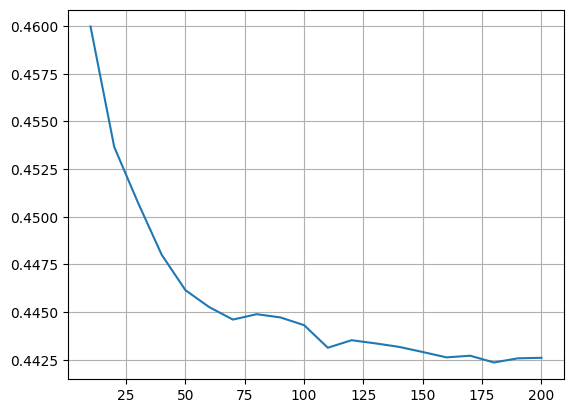

In [32]:
plt.plot([x[0] for x in rmses], [x[1] for x in rmses])
plt.grid(True)

In [45]:
rmses

[(10, 0.4599777557336148),
 (20, 0.4536590650783847),
 (30, 0.45074274602790043),
 (40, 0.4480067936304668),
 (50, 0.44615128055079933),
 (60, 0.4452658337959235),
 (70, 0.4446098249138531),
 (80, 0.44489319803906885),
 (90, 0.4447241129599526),
 (100, 0.4443178455925074),
 (110, 0.44313500906534525),
 (120, 0.4435285723898764),
 (130, 0.44336417807088435),
 (140, 0.4431801001185646),
 (150, 0.442909875717056),
 (160, 0.4426293654180784),
 (170, 0.4427157028806333),
 (180, 0.442361681446206),
 (190, 0.4425785032007027),
 (200, 0.44260685365230207)]

## Q4

In [48]:
max_depths = [10, 15, 20, 25]

scores = []


for max_depth in max_depths:
    rmses = []
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, max_depth=max_depth, random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmses.append(root_mean_squared_error(y_val, y_pred))
    mean_rmse = np.mean(rmses)
    scores.append((max_depth, mean_rmse))


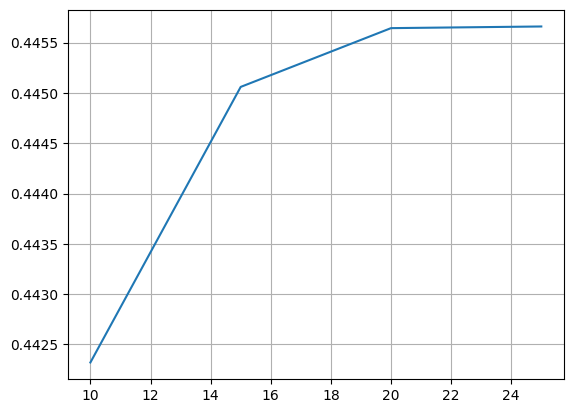

In [49]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'mean_rmse'])

plt.plot(df_scores.max_depth, df_scores.mean_rmse)
plt.grid(True)

## Q5

In [50]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20,
                            random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
rf.feature_importances_

array([1.14707165e-02, 3.81809750e-04, 3.11842085e-04, 3.26932342e-03,
       3.43693411e-04, 3.36671988e-04, 1.60402148e-02, 3.18229841e-03,
       2.35867094e-03, 1.59113306e-03, 4.76103046e-04, 5.20358083e-04,
       5.55151959e-04, 9.59162013e-01])

In [55]:
importances = dict(zip(dv.get_feature_names_out(), rf.feature_importances_))

In [58]:
importances

{'acceleration': np.float64(0.011470716492980806),
 'drivetrain=All-wheel drive': np.float64(0.0003818097503064216),
 'drivetrain=Front-wheel drive': np.float64(0.0003118420847931972),
 'engine_displacement': np.float64(0.003269323417164296),
 'fuel_type=Diesel': np.float64(0.0003436934113118486),
 'fuel_type=Gasoline': np.float64(0.0003366719883675566),
 'horsepower': np.float64(0.016040214819390435),
 'model_year': np.float64(0.003182298414589243),
 'num_cylinders': np.float64(0.002358670936092339),
 'num_doors': np.float64(0.0015911330645071602),
 'origin=Asia': np.float64(0.0004761030460744537),
 'origin=Europe': np.float64(0.0005203580827405701),
 'origin=USA': np.float64(0.0005551519590829983),
 'vehicle_weight': np.float64(0.9591620125325987)}

In [60]:
cats = {'vehicle_weight', 'horsepower', 'acceleration', 'engine_displacement'}
subset_importances = {k: importances[k] for k in cats}
subset_importances

{'horsepower': np.float64(0.016040214819390435),
 'acceleration': np.float64(0.011470716492980806),
 'vehicle_weight': np.float64(0.9591620125325987),
 'engine_displacement': np.float64(0.003269323417164296)}

## Q6

In [61]:
import xgboost as xgb

In [62]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [72]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [73]:
y_pred = model.predict(dval)

error = root_mean_squared_error(y_val, y_pred)

In [74]:
error

0.42622800553359225

errors = {'eta=0.3' : 0.45017755678087246, 'eta=0.1' : 0.42622800553359225}